In [8]:
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset

ds = xr.open_dataset('/home/inhye_yoo/ace/Siren_pt/data/ERA.mtpr.195001_201912.nc')
ds_uv = Dataset('/home/inhye_yoo/ace/Siren_pt/data/MERRA2_3d_uv.198001_202312.nc')
df = ds_uv.variables['u_monthly'][:,:,:]
# print(df)

ds_uv = xr.open_dataset('/home/inhye_yoo/ace/Siren_pt/data/MERRA2_3d_uv.198001_202312.nc')
df = ds_uv.to_dataframe().reset_index()
print(df)

# 한반도 지역 데이터만 추출
ds_kor = ds.where((ds.lon > 100) & (ds.lon < 150) & (ds.lat < 50) & (ds.lat > 20), drop=True)
df = ds.to_dataframe().reset_index()
df.head(15)

                  time             z             y             x  u_monthly  \
0         9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36  -2.550035   
1         9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36  -2.600477   
2         9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36  -2.645967   
3         9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36  -2.686422   
4         9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36  -2.721763   
...                ...           ...           ...           ...        ...   
55503355  9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   0.208697   
55503356  9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   0.260148   
55503357  9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   0.311103   
55503358  9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   0.361466   
55503359  9.969210e+36  9.969210e+36  9.969210e+36  9.969210e+36   0.411141   

          v_monthly  
0          1.212038  
1      

,time,lon,lat,lev,mtpr
0,1950-01-01,0.0,-90.0,1.0,2.130103e-06
1,1950-01-01,0.0,-87.5,1.0,1.020204e-06
2,1950-01-01,0.0,-85.0,1.0,5.148884e-07
3,1950-01-01,0.0,-82.5,1.0,1.681399e-07
4,1950-01-01,0.0,-80.0,1.0,1.033812e-07
5,1950-01-01,0.0,-77.5,1.0,2.497401e-07
6,1950-01-01,0.0,-75.0,1.0,6.331726e-07
7,1950-01-01,0.0,-72.5,1.0,5.561438e-07
8,1950-01-01,0.0,-70.0,1.0,2.871788e-06
9,1950-01-01,0.0,-67.5,1.0,6.378358e-06


In [11]:
import pandas as pd

for i in range(1950, 2023):
    i2 = pd.to_datetime(str(i) + '-07-01T00:00:00.000000000') 
    nm = '_kor' + str(i)  #연도별 데이터명

    # 연도별 데이터명 객체에 연도별 데이터만 추출해서 적용
    globals()['ds{}'.format(str(nm))] = ds_kor.where(ds_kor.time == i2, drop=True) 

print(ds_kor1950.to_dataframe().sort_values(by='mtpr'))
ds_kor1950['mtpr'] = ds_kor1965['mtpr'] * 86400
df = ds_kor1950.to_dataframe().reset_index()  # reset_index로 time, 위도, 경도 열을 가져옴
df_sorted = df.sort_values(by=['time', 'lat', 'lon'])  # 'time', 'lat', 'lon' 기준으로 정렬

# 최종 데이터 확인
print(df_sorted[['time', 'lat', 'lon', 'mtpr']])

                               mtpr
time       lev lat  lon            
1950-07-01 1.0 42.5 102.5  0.000009
               40.0 132.5  0.000009
               45.0 105.0  0.000009
               42.5 107.5  0.000011
                    105.0  0.000011
...                             ...
               22.5 132.5  0.000184
                    125.0  0.000184
                    127.5  0.000188
                    142.5  0.000193
                    130.0  0.000212

[209 rows x 1 columns]
          time   lat    lon  mtpr
0   1950-07-01  22.5  102.5   NaN
11  1950-07-01  22.5  105.0   NaN
22  1950-07-01  22.5  107.5   NaN
33  1950-07-01  22.5  110.0   NaN
44  1950-07-01  22.5  112.5   NaN
..         ...   ...    ...   ...
164 1950-07-01  47.5  137.5   NaN
175 1950-07-01  47.5  140.0   NaN
186 1950-07-01  47.5  142.5   NaN
197 1950-07-01  47.5  145.0   NaN
208 1950-07-01  47.5  147.5   NaN

[209 rows x 4 columns]


In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('font', family='Malgun Gothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (6,6) #차트 사이즈

In [13]:
from mpl_toolkits.basemap import Basemap, cm

m= Basemap(
    llcrnrlon=min(ds_kor.lon),
    llcrnrlat=min(ds_kor.lat),
    urcrnrlon=max(ds_kor.lon),
    urcrnrlat=max(ds_kor.lat), 
    resolution='i',projection='cyl',
    lon_0=(max(ds_kor.lon)-min(ds_kor.lon)) / 2,
    lat_0=(max(ds_kor.lat)-min(ds_kor.lat)) / 2
    )

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

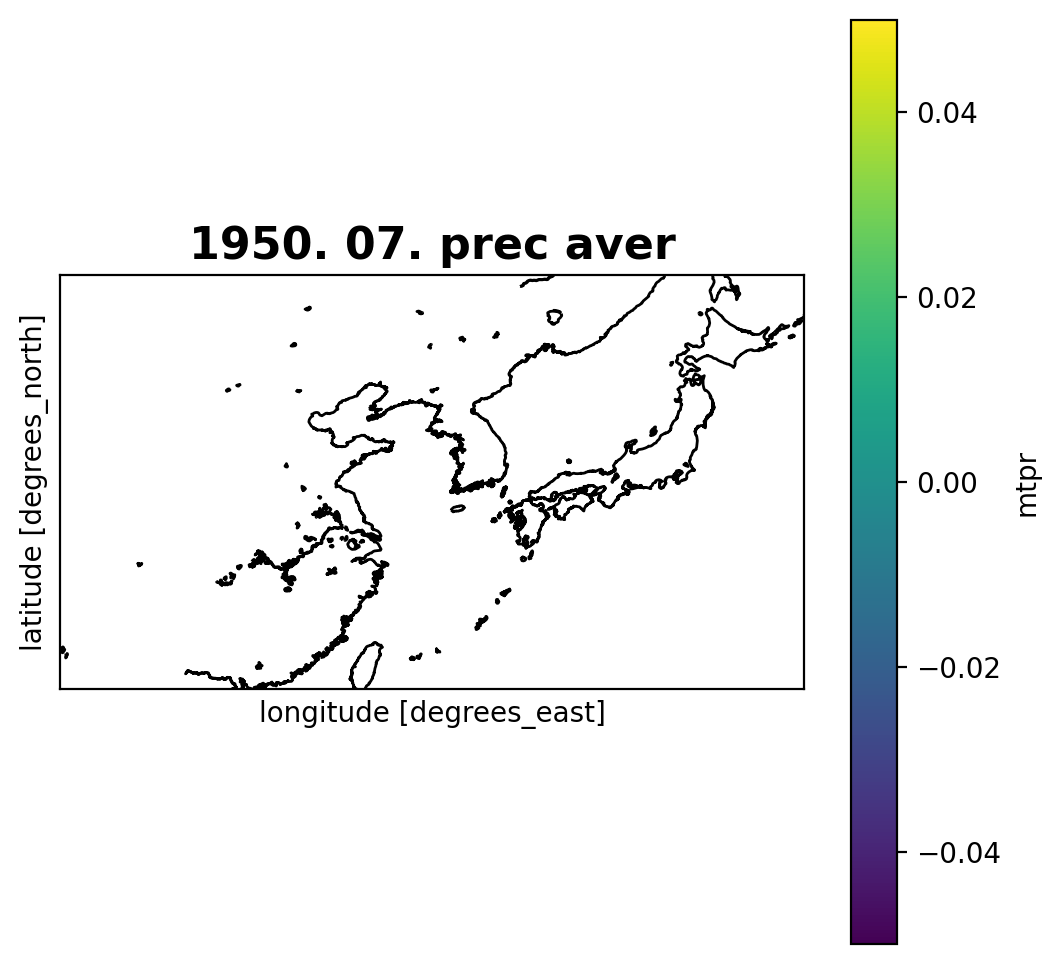

In [15]:
ds_kor1950.mtpr.plot()
m.drawcoastlines()
plt.title("1950. 07. prec aver", fontsize=16, weight='bold')
plt.show()
# plt.text(125, 32,"1950년 07월 평균 기온", fontdict={'weight': 'bold', 'size': 14})

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

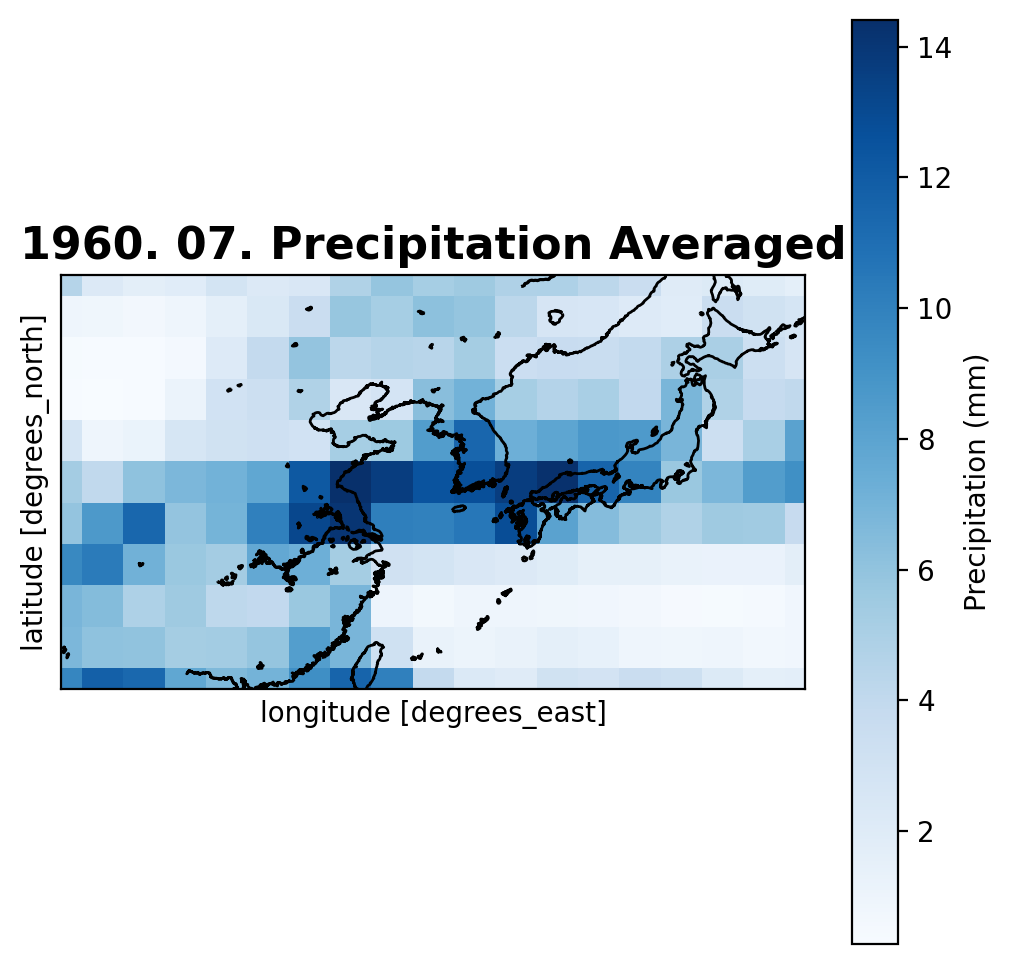

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('font', family='Malgun Gothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (6,6) #차트 사이즈

# 지도 그리기
m = Basemap(llcrnrlon=min(ds_kor.lon), llcrnrlat=min(ds_kor.lat),
            urcrnrlon=max(ds_kor.lon), urcrnrlat=max(ds_kor.lat), 
            resolution='i', projection='cyl', 
            lon_0=(max(ds_kor.lon)-min(ds_kor.lon)) / 2, 
            lat_0=(max(ds_kor.lat)-min(ds_kor.lat)) / 2)

# 강수량 데이터를 컬러맵으로 표현
fig, ax = plt.subplots(figsize=(6,6))
c = ds_kor1965.mtpr.plot(ax=ax, cmap='Blues', add_colorbar=False)  # 컬러바 기본 생성을 막음

# 바다와 해안선 그리기
m.drawcoastlines()

# 제목 설정
plt.title("1960. 07. Precipitation Averaged", fontsize=16, weight='bold')

# 컬러바 추가
plt.colorbar(c, ax=ax, label='Precipitation (mm)')

plt.show()